In [2]:
from astropy import constants as cn
from astropy import units as u

L_Sun = 3.828e26 * u.W
d = 1.496e11 * u.m

import numpy as np

F_Surf = L_Sun / (4 * np.pi * d**2)
F = F_Surf * .25 * (1 - .3) 

print F_Surf
print F

boltz = 5.670373e-8 * u.W * u.m**-2 * u.K**-4
T = (F/boltz)**.25

print T, "Part A"
T_C = ((T / u.K) - 273.15)
T_F = (9.0/5.0) * T_C + 32.0

print T_F, "F"
print T_C, "C"
print "\n"

F_new = (boltz * T**4 * 0.3) / (1 - .3)

F = F_new/0.3

T = (F_Surf/boltz * .3)**.25

print F

print T, "Part B"

T_C = ((T / u.K) - 273.15)
T_F = (9.0/5.0) * T_C + 32.0

print T_F, "F"
print T_C, "C"

1361.12771793 W / m2
238.197350638 W / m2
254.584128316 K Part A
-1.41856903108 F
-18.5658716839 C


340.281929483 W / m2
291.307808609 K Part B
64.6840554956 F
18.1578086087 C


c) $F = \pi\int_0^\infty{(1 - A(\lambda))B_{\lambda,T}d\lambda}$

d) $A(\lambda)$ is most influenced by greenhouse gases. Water is the most prominent greenhouse gas. Carbon dioxide is the most problematic

e) we are in trouble

# 2

In [3]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


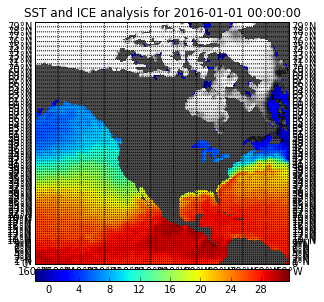

In [10]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
date = datetime(2016,1,1,0) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(llcrnrlon=-160,llcrnrlat=0,urcrnrlon=-50,urcrnrlat=80,projection='mill')
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,90.,1.),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[1,1,0,1])

# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

In [10]:
with open("Data.txt") as textfile:
    lines = [line.split() for line in textfile]
time = np.zeros(38)
precip = np.zeros(38)
snow = np.zeros(38)
nino = np.zeros(38)
deg = np.zeros(38)
for i in range(1, 39):
    time[i-1] = float(lines[i][0])
    precip[i-1] = float(lines[i][1])
    snow[i-1] = float(lines[i][2])
    nino[i-1] = float(lines[i][3])
    deg[i-1] = float(lines[i][4])

plt.plot(time, nino)
plt.xlabel('year')
plt.ylabel('temperature')



[ 6.94305  5.2836   4.62315  4.4844   5.6166   5.20035  6.4602   6.27705
  7.14285  4.17915  7.32045  7.5591   6.1383   6.0384   6.59895  4.9617
  7.3815   5.67765  5.8053   4.70085  5.48895  5.96625  6.438    4.64535
  5.77755  6.8487   7.5258   6.8487   5.7942   5.6943   7.0263   5.67765
  6.03285  7.23165  5.86635  6.46575  6.88755  5.7276 ]


c) 1998, 1983, 1973, 1992, 1987

d) yes

In [9]:
import scipy.stats as stats
stats.pearsonr(precip, nino)

(0.21578315741681758, 0.19321287298822976)

In [11]:
stats.pearsonr(snow, nino)

(0.22193218268418724, 0.18052143629081543)

In [12]:
stats.pearsonr(deg, nino)

(0.14197230760465335, 0.39518075319425461)

e) there is a weak correlation, its consistent with maps

f) the animation shows a temperature map, we are in a warm event

